In [1]:
import numpy as np
import pandas as pd
import os

from matplotlib import pyplot as plt

os.chdir('C://Users//Administrator//Desktop//MACHINE LEARNING//sign_language')

In [2]:
os.listdir()

['inp.npy', 'op.npy', 'X.npy', 'Y.npy']

In [3]:
x = np.load('X.npy')
y = np.load('Y.npy')

In [4]:
x.shape, y.shape

((2062, 64, 64), (2062, 10))

In [5]:
x[0].shape,y[0].shape

((64, 64), (10,))

In [6]:
x1 = []
for matrix in x:
    x1.append(matrix.reshape(1,-1))

x1 = np.array(x1).reshape(2062,4096)       ## ALL ROWS

x1.shape

(2062, 4096)

In [7]:
y1 = []
for i in range(len(y)):
    index =0
    for value in y[i]:
        if value != 1:
            index = index+1
        else:
             y1.append(index+1)
                
y1 = np.array(y1).reshape(-1,1)                  

In [8]:
y1.shape

(2062, 1)

In [9]:
x[0].shape

(64, 64)

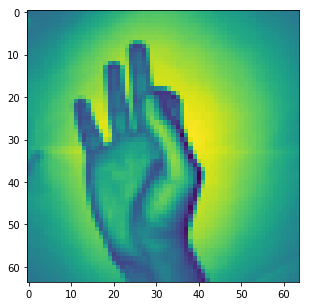

In [11]:
plt.rcParams['figure.figsize'] = [5,5]
plt.imshow(x[0])                                  ## THE DATA IS NOT ACCURATE

In [64]:
y1.iloc[1,]      ## THE DATA IS NOT ACCURATE

0    1
Name: 1, dtype: int32

In [ ]:
## THE DATA IS NOT ACCURATE

In [12]:
x1,y1 = pd.DataFrame(x1),pd.DataFrame(y1)

In [13]:
from sklearn.model_selection import train_test_split as tts

x_tr,x_ts,y_tr,y_ts = tts(x1,y1,test_size =0.2,random_state =3)

# LOGISTIC REGRESSION

In [14]:
from sklearn.linear_model import LogisticRegression

lr =LogisticRegression()

lr.fit(x_tr,y_tr)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
lr.score(x_tr,y_tr), lr.score(x_ts,y_ts)

(0.9963614311704063, 0.7457627118644068)

#Generating Classification report

In [16]:
from sklearn.metrics import classification_report as cr ,accuracy_score as acs,f1_score as f1,confusion_matrix as cm

In [17]:
print(cr(y_ts,lr.predict(x_ts)))

              precision    recall  f1-score   support

           1       0.87      0.81      0.84        48
           2       0.84      0.82      0.83        45
           3       0.57      0.66      0.61        38
           4       0.56      0.72      0.63        32
           5       0.75      0.93      0.83        41
           6       0.71      0.60      0.65        42
           7       0.68      0.54      0.60        48
           8       0.88      0.81      0.85        37
           9       0.74      0.71      0.73        45
          10       0.87      0.89      0.88        37

   micro avg       0.75      0.75      0.75       413
   macro avg       0.75      0.75      0.74       413
weighted avg       0.75      0.75      0.75       413



# DECISION TREE

In [22]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='gini')

dtc.fit(x_tr,y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
dtc.score(x_tr,y_tr),dtc.score(x_ts,y_ts)

(1.0, 0.5835351089588378)

In [24]:
x_tr,x_ts,y_tr,y_ts = tts(x1,y1,test_size =0.4)

In [25]:
dtc1 = DecisionTreeClassifier(criterion='gini')

dtc1.fit(x_tr,y_tr)

dtc1.score(x_tr,y_tr),dtc1.score(x_ts,y_ts)

(1.0, 0.46545454545454545)

# RANDOM FOREST

In [26]:
from sklearn.model_selection import train_test_split as tts

x_tr,x_ts,y_tr,y_ts = tts(x1,y1,test_size =0.2,random_state =3)

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 251)

rf.fit(x_tr,y_tr)

rf.score(x_tr,y_tr),rf.score(x_ts,y_ts)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


(1.0, 0.7723970944309927)

# XG BOOST

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
xg = GradientBoostingClassifier(n_estimators=13,random_state = 3)

xg.fit(x_tr,y_tr)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=13,
              n_iter_no_change=None, presort='auto', random_state=3,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [67]:
xg.score(x_tr,y_tr),xg.score(x_ts,y_ts)

(0.908429351121892, 0.6707021791767555)

# 1. DIFFERENT CLASSIFIERS RESULTS

['']

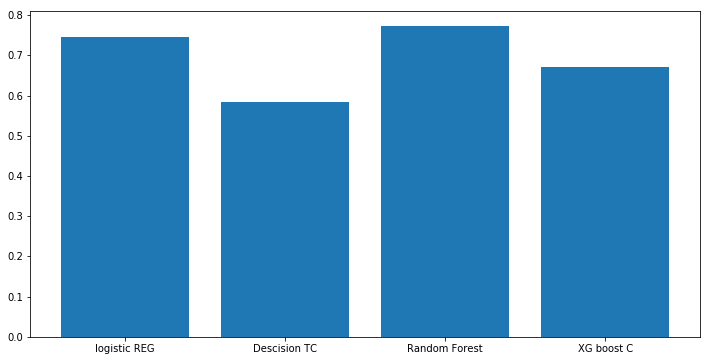

In [79]:
scores = [lr.score(x_ts,y_ts),dtc.score(x_ts,y_ts),rf.score(x_ts,y_ts),xg.score(x_ts,y_ts)]

plt.rcParams['figure.figsize'] = [12,6]
plt.bar(['logistic REG','Descision TC','Random Forest','XG boost C'],scores)  ## RANDOM FOREST HIGHES


# ROC CURVE

In [127]:
from scikitplot.metrics import plot_roc_curve

import matplotlib.pyplot as plt

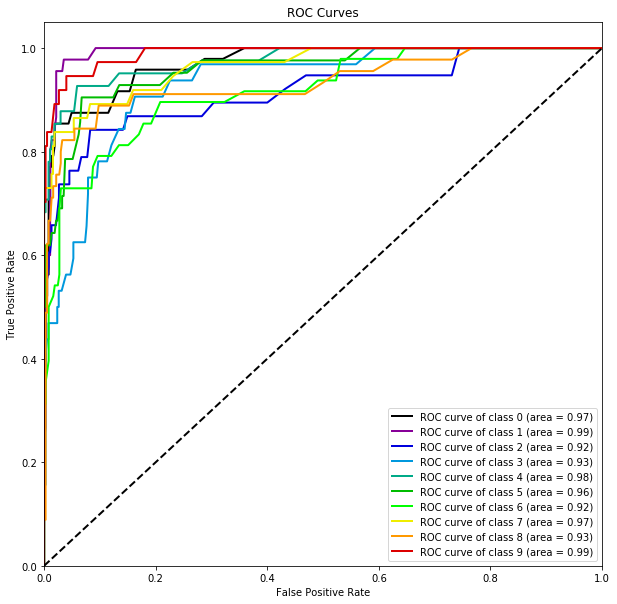

In [271]:
plt.rcParams['figure.figsize'] = [10,10]
plot_roc_curve(y_ts,rf.predict_proba(x_ts),curves = 'each_class')

# CROSS VALIDATION

In [180]:
from sklearn.metrics import roc_curve,auc     #MULTICLASS NOT SUPPORTED

import warnings

warnings.filterwarnings('ignore')

In [272]:
from sklearn.model_selection import KFold,cross_val_score

kf = KFold(n_splits=5, shuffle=True)

scores = cross_val_score(rf,x1,y1,cv=kf,scoring='accuracy')

In [273]:
print(scores)
scores.mean()

[0.80387409 0.78934625 0.80582524 0.76941748 0.77184466]


0.7880615435247654

# hyper parameter tuning 

In [149]:
from sklearn.model_selection import GridSearchCV

rf1 = RandomForestClassifier()

gscv = GridSearchCV(rf1,param_grid={'n_estimators' :[int(x) for x in np.linspace(51,251,3)]},cv =5)

In [183]:
gscv.fit(x1,y1)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [51, 151, 251]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [184]:
gscv.best_params_

{'n_estimators': 251}

# Test the model with your own sign image captured with your mobile cam 

In [29]:
os.chdir('c://users//administrator//desktop')

In [30]:
sample = plt.imread('IMG_20190303_170540.jpg')
sample.shape

(3456, 4608, 3)

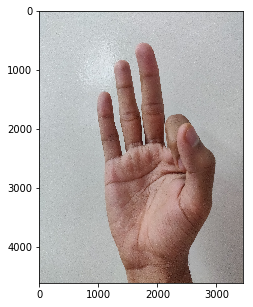

In [33]:
plt.imshow(sample1)

In [40]:
!pip install python-resize-image

  Found existing installation: requests 2.18.4
    Uninstalling requests-2.18.4:
      Successfully uninstalled requests-2.18.4


You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [50]:
from PIL import Image

from resizeimage import resizeimage

with open('IMG_20190303_170540.jpg', 'r+b') as f:
    with Image.open(f) as image:
        sample3 = resizeimage.resize_cover(image, [64, 64])
        sample3.save('img_resized.jpeg',image.format)

In [51]:
sample2 = plt.imread('img_resized.jpeg')
sample2.shape

(64, 64, 3)

In [53]:
sample2 = sample2[:,:,0]

In [55]:
from scipy import ndimage

sample2 = ndimage.rotate(sample2,angle=-90)

In [60]:
sample2.shape

(64, 64)

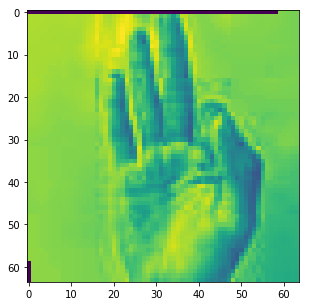

In [56]:
plt.imshow(sample2)

In [61]:
rf.predict(sample2.reshape(1,-1))  

array([5])

# 6.Extract and display all the wrongly classified 8’s

In [274]:
y_tsp = rf.predict(x_ts)

In [275]:
df = pd.DataFrame(np.concatenate([y_ts.values,y_tsp.reshape(-1,1)],axis=1),columns= ['y_true','y_pred'],index=y_ts.index)

In [276]:
df.head()

,y_true,y_pred
1130,5,0
393,1,1
211,1,1
1846,8,3
3,0,0


In [277]:
df[(df['y_true'] == 8) & (df['y_true'] != df['y_pred'])].head(3)     ## ALL WRONGLY CLASSIFIED 8's

,y_true,y_pred
1846,8,3
1849,8,4
1836,8,2


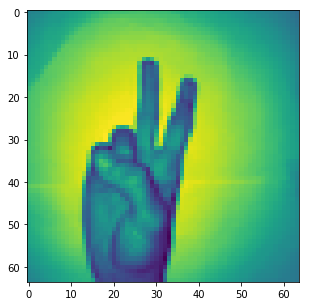

In [281]:
plt.rcParams['figure.figsize'] = [5,5]
plt.imshow(x1.loc[1678].reshape(64,64))

In [252]:
y[1678]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [279]:
wc_imgs = df[(df['y_true'] == 8) & (df['y_true'] != df['y_pred'])].index
wc_imgs

Int64Index([1846, 1849, 1836, 1833, 1796, 1799, 1800], dtype='int64')

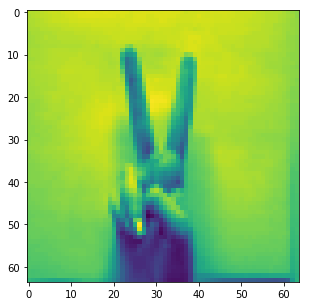

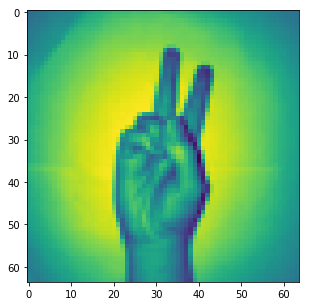

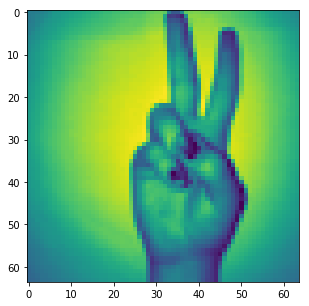

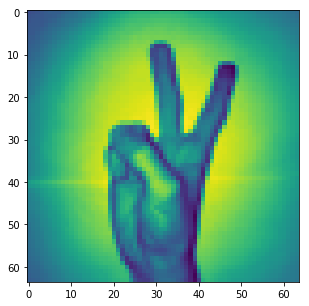

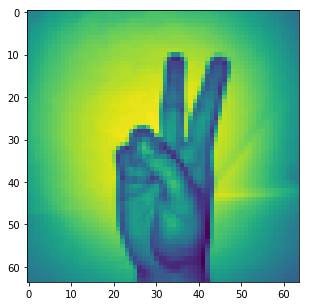

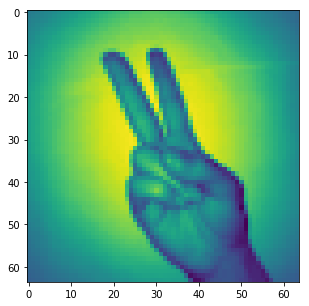

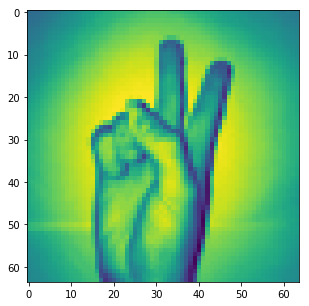

In [282]:
for img in wc_imgs:
    plt.imshow(x1.loc[img].reshape(64,64))
    plt.show()

In [259]:
x1

(2062, 4096)

In [267]:
x1.loc[2061,:].reshape(64,64) == x[2061]     ##CHECKING

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])